**Import Required Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

**Import Training Data**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv("/content/drive/My Drive/Bankruptcy prediction of companies/Train.csv")
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,0,0.512114,0.592237,0.559612,0.613175,0.613175,0.999062,0.797565,0.809463,0.303636,...,0.826537,0.011653,0.623926,0.613173,0.842158,0.278042,0.026838,0.565373,1,0.039038
1,0,0.492224,0.562582,0.551100,0.600311,0.600333,0.998979,0.797417,0.809353,0.303551,...,0.811231,0.007018,0.623684,0.600313,0.841243,0.279404,0.026974,0.565902,1,0.030731
2,0,0.527812,0.585805,0.576958,0.605457,0.605363,0.999076,0.797615,0.809512,0.303694,...,0.823664,0.003584,0.628218,0.605454,0.841501,0.275661,0.026856,0.565451,1,0.109045
3,0,0.565690,0.639610,0.624819,0.602769,0.602769,0.999053,0.797495,0.809416,0.303535,...,0.842413,0.005825,0.624091,0.602766,0.843951,0.280197,0.026814,0.565266,1,0.027782
4,0,0.516112,0.586077,0.568392,0.605543,0.605551,0.999075,0.797713,0.809605,0.303867,...,0.817378,0.005758,0.624746,0.605544,0.841366,0.276985,0.026867,0.565496,1,0.052249


**Exploratory Data Analysis**

checking null values and duplicates

In [4]:
df.isnull().sum().sum()

np.int64(0)

In [5]:
df.duplicated().sum()

np.int64(0)

Count of Bankrupt and Non-Bankrupt data

Text(0, 0.5, 'Number of Companies')

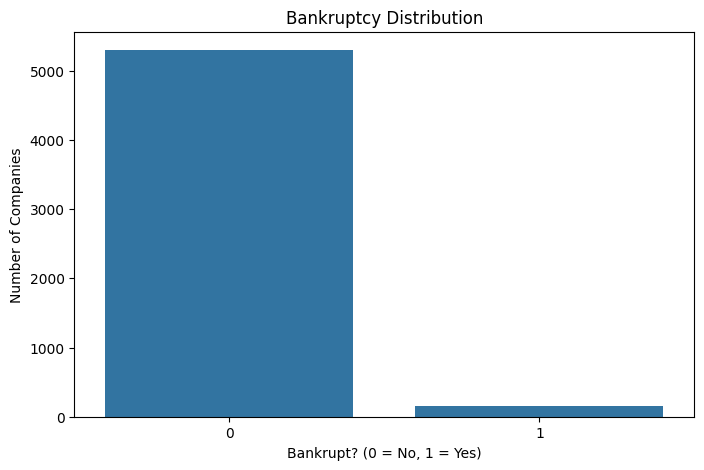

In [6]:
# Number of bankrupt companies
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='Bankrupt?', data=df)
plt.title('Bankruptcy Distribution')
plt.xlabel('Bankrupt? (0 = No, 1 = Yes)')
plt.ylabel('Number of Companies')

In [7]:
non_bankrupt = (df['Bankrupt?'] == 0).sum()
bankrupt = (df['Bankrupt?'] == 1).sum()

print(f"Non-Bankrupted companies: {non_bankrupt}")
print(f"Bankrupted companies    : {bankrupt}")

Non-Bankrupted companies: 5301
Bankrupted companies    : 154


This is a highly imbalanced dataset, because the bankrupt class makes up only about 2.8% of the data. So Oversampling is to be done to prevent model being biased to Non-bankrupt Class

**Analysing the Data Columns**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5455 entries, 0 to 5454
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 5455 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  5455 non-null   float64
 2    ROA(A) before interest and % after tax                   5455 non-null   float64
 3    ROA(B) before interest and depreciation after tax        5455 non-null   float64
 4    Operating Gross Margin                                   5455 non-null   float64
 5    Realized Sales Gross Margin                              5455 non-null   float64
 6    Operating Profit Rate                                    5455 non-null   float64
 7    Pre-tax net Interest Rate                                5455 non-null   float64
 8    After-tax net Int

Analysing the feautures with integer values

In [9]:
df.dtypes[df.dtypes == 'int64'].index

Index(['Bankrupt?', ' Liability-Assets Flag', ' Net Income Flag'], dtype='object')

In [10]:
print(df[[' Liability-Assets Flag','Bankrupt?']].value_counts())
print(df[[' Net Income Flag','Bankrupt?']].value_counts())

 Liability-Assets Flag  Bankrupt?
0                       0            5299
                        1             149
1                       1               5
                        0               2
Name: count, dtype: int64
 Net Income Flag  Bankrupt?
1                 0            5301
                  1             154
Name: count, dtype: int64


Net Income flag is 1 for every data, so it is of no use for our model development. So we can remove it.

In [11]:
df = df.drop(columns = " Net Income Flag")
df.shape

(5455, 95)

Analysing the features with Numeric Values

In [12]:
df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
count,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,...,5455.000000,5455.000000,5.455000e+03,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000
mean,0.028231,0.507698,0.560788,0.555957,0.608880,0.608862,0.998693,0.797137,0.809032,0.303661,...,0.001283,0.808851,2.328763e+07,0.623872,0.608878,0.840506,0.280262,0.027138,0.565342,0.050020
std,0.165647,0.063940,0.069656,0.065135,0.018345,0.018328,0.014545,0.014384,0.015192,0.012473,...,0.035802,0.042398,4.207705e+08,0.012348,0.018345,0.011277,0.014669,0.006548,0.009226,0.053405
min,0.000000,0.024277,0.000000,0.033514,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.344652,0.000000,0.000000,0.172065,0.000000
25%,0.000000,0.477210,0.536034,0.527437,0.600837,0.600812,0.998970,0.797388,0.809313,0.303468,...,0.000000,0.797123,8.080725e-04,0.623687,0.600832,0.840142,0.276771,0.026791,0.565158,0.024845
50%,0.000000,0.505484,0.562255,0.555222,0.607021,0.606999,0.999027,0.797471,0.809382,0.303526,...,0.000000,0.812325,1.893891e-03,0.623904,0.607019,0.841302,0.278567,0.026803,0.565220,0.035048
75%,0.000000,0.541242,0.593954,0.589914,0.615301,0.615287,0.999109,0.797598,0.809486,0.303588,...,0.000000,0.829114,4.845815e-03,0.624185,0.615300,0.842516,0.281291,0.026883,0.565594,0.056410
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,9.820000e+09,0.956387,1.000000,0.996912,1.000000,0.464388,0.736985,1.000000


In [13]:
print(df.mean().apply(lambda x: f"{x:.6f}").to_string())

Bankrupt?                                                            0.028231
 ROA(C) before interest and depreciation before interest             0.507698
 ROA(A) before interest and % after tax                              0.560788
 ROA(B) before interest and depreciation after tax                   0.555957
 Operating Gross Margin                                              0.608880
 Realized Sales Gross Margin                                         0.608862
 Operating Profit Rate                                               0.998693
 Pre-tax net Interest Rate                                           0.797137
 After-tax net Interest Rate                                         0.809032
 Non-industry income and expenditure/revenue                         0.303661
 Continuous interest rate (after tax)                                0.781335
 Operating Expense Rate                                     1888837434.647613
 Research and development expense rate                      2022

 We observe that there are some features with high mean values

**Analysing high mean features**

In [14]:
pd.options.display.float_format = '{:.6f}'.format  # Show 6 decimal places

print(df[["Bankrupt?", " Interest-bearing debt interest rate"]].to_string())

      Bankrupt?   Interest-bearing debt interest rate
0             0                              0.000593
1             0                              0.000619
2             0                              0.000829
3             0                              0.000761
4             0                              0.000412
5             0                              0.001309
6             0                              0.000568
7             0                              0.000449
8             0                              0.000669
9             0                              0.000000
10            0                              0.000667
11            0                              0.001020
12            0                              0.000510
13            0                              0.000363
14            0                              0.000846
15            0                              0.000948
16            0                              0.000655
17            0             

We can see that values are wrong in some columns . Our actual value should be between 0 and 1 but some values are so large than that

**Removing Data Errors**

In [15]:
# Find columns that have at least one value greater than 1
high_value_columns = []
for column in df.columns:
    if (df[column] > 1).any():
        high_value_columns.append(column)

# Print how many values are greater than 1 in each of those columns
for column in high_value_columns:
    count = (df[column] > 1).sum()
    print(f" {column} : {count} ")

  Operating Expense Rate : 1724 
  Research and development expense rate : 3106 
  Interest-bearing debt interest rate : 208 
  Revenue Per Share (Yuan ¥) : 5 
  Total Asset Growth Rate : 4690 
  Net Value Growth Rate : 2 
  Current Ratio : 1 
  Quick Ratio : 9 
  Total debt/Total net worth : 7 
  Accounts Receivable Turnover : 21 
  Average Collection Days : 18 
  Inventory Turnover Rate (times) : 2221 
  Fixed Assets Turnover Frequency : 915 
  Revenue per person : 1 
  Allocation rate per person : 9 
  Quick Assets/Current Liability : 3 
  Cash/Current Liability : 34 
  Inventory/Current Liability : 99 
  Long-term Liability to Current Assets : 88 
  Current Asset Turnover Rate : 869 
  Quick Asset Turnover Rate : 1593 
  Cash Turnover Rate : 3105 
  Fixed Assets to Assets : 1 
  Total assets to GNP price : 20 


So we remove the columns with large data errors and replace smaller errors with the median of the column.

**Removing columns with large Errors**

In [16]:
# List of columns that have data quality issues in over 800 rows (out of 5455)
columns_with_heavy_errors = [
    " Total Asset Growth Rate",
    " Cash Turnover Rate",
    " Research and development expense rate",
    " Inventory Turnover Rate (times)",
    " Operating Expense Rate",
    " Quick Asset Turnover Rate",
    " Fixed Assets Turnover Frequency",
    " Current Asset Turnover Rate",
    " Interest-bearing debt interest rate"
]

# Removing the problematic columns from the dataset
df.drop(columns=columns_with_heavy_errors, inplace=True)

Replacing smaller errors with medians

In [17]:
columns_with_minor_errors = [
    " Revenue Per Share (Yuan ¥)",
    " Net Value Growth Rate",
    " Current Ratio",
    " Quick Ratio",
    " Total debt/Total net worth",
    " Accounts Receivable Turnover",
    " Average Collection Days",
    " Revenue per person",
    " Allocation rate per person",
    " Quick Assets/Current Liability",
    " Cash/Current Liability",
    " Inventory/Current Liability",
    " Long-term Liability to Current Assets",
    " Total assets to GNP price"
]

# Replace outlier/error values with NaN, then fill with median of that column
for col in columns_with_minor_errors:
    df[col] = df[col].where(df[col] <= 1, np.nan)

df.fillna({col: df[col].median(skipna=True) for col in columns_with_minor_errors}, inplace=True)


In [18]:
bankrupted = df[df["Bankrupt?"]==1]
not_bankrupted = df[df["Bankrupt?"]==0]
bankrupted

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
77,1,0.443524,0.490242,0.496440,0.584161,0.584327,0.998534,0.796773,0.808765,0.303358,...,0,0.767153,0.005749,0.622145,0.584159,0.837976,0.278401,0.026603,0.564065,0.036259
78,1,0.498903,0.566670,0.559987,0.603151,0.603151,0.999019,0.797448,0.809387,0.303520,...,0,0.810075,0.005414,0.622915,0.603148,0.841679,0.284778,0.027549,0.567263,0.019819
79,1,0.024277,0.000000,0.033514,0.591324,0.591324,0.994015,0.791503,0.803775,0.303602,...,0,0.584583,0.001884,0.623818,0.591322,0.827165,0.276846,0.026791,0.565158,0.054959
80,1,0.459221,0.520661,0.511109,0.594395,0.594395,0.998853,0.797259,0.809193,0.303540,...,0,0.780051,0.009528,0.623364,0.594393,0.838166,0.285057,0.025970,0.547552,0.019561
81,1,0.411300,0.475469,0.456074,0.593688,0.593688,0.998872,0.797057,0.809027,0.303147,...,0,0.749555,0.017571,0.622808,0.593690,0.830318,0.298268,0.026437,0.562615,0.014336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5227,1,0.418515,0.433984,0.461427,0.612750,0.612750,0.998864,0.796902,0.808857,0.302892,...,0,0.725750,0.000487,0.623730,0.612747,0.828067,0.292648,0.026666,0.564481,0.015620
5276,1,0.196802,0.211023,0.221425,0.598056,0.598056,0.998933,0.796144,0.808149,0.301423,...,1,0.519388,0.017588,0.623465,0.598051,0.856906,0.259280,0.026769,0.565052,0.003946
5277,1,0.337640,0.254307,0.378446,0.590842,0.590842,0.998869,0.796943,0.808897,0.302953,...,0,0.557733,0.000847,0.623302,0.590838,0.726888,0.336515,0.026777,0.565092,0.011797
5278,1,0.340028,0.344636,0.380213,0.581466,0.581466,0.998372,0.796292,0.808283,0.302857,...,0,0.641804,0.000376,0.623497,0.581461,0.765967,0.337315,0.026722,0.564807,0.011777


Now we cleaned our dataset and our next task is to prepare it for model training because using 86 features to train a model results in high noise and poor model performance while testing, so we try extracting the most important features which significantly affects the result and use this subset of columns to train our model

**Observing the correlation among features**

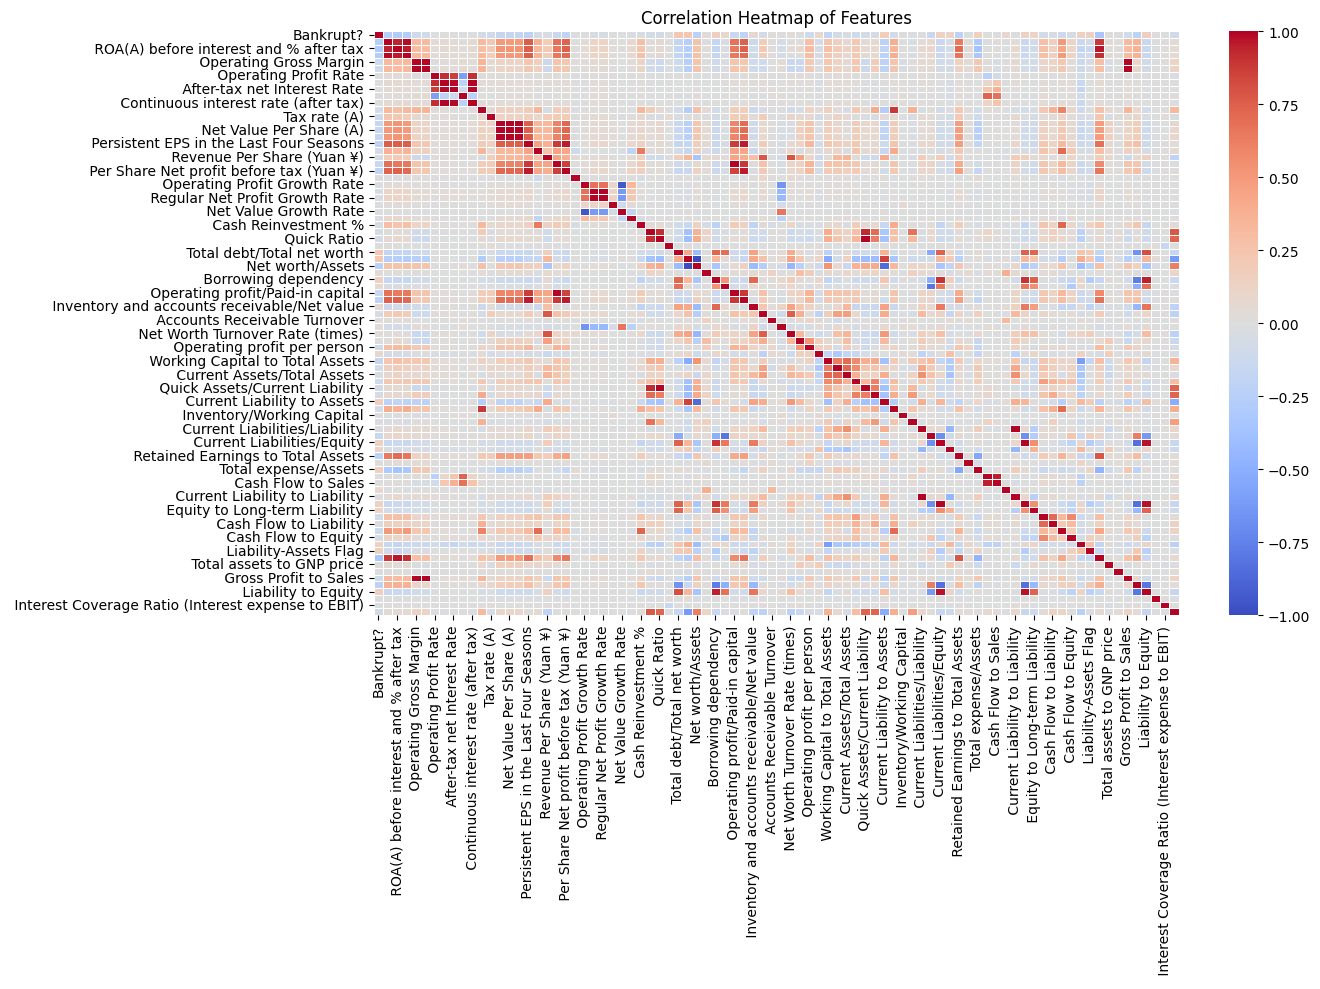

In [19]:
# Calculate the correlation matrix for the dataset
correlation_matrix = df.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm',annot=False,linewidths=0.5,vmin=-1, vmax=1, )

plt.title("Correlation Heatmap of Features")
plt.tight_layout()
plt.show()

We can observe that some columns are highly correlated with each other . So considering only one of the highly correlated columns is sufficient to train the model

**Dropping one of the highly Correlated features**

In [20]:
def drop_high_corr_features(df, threshold=0.90, target='Bankrupt?'):
    features = df.columns
    features.drop('Bankrupt?')

    corr_matrix = df[features].corr().abs()
    target_corr = df[features].corrwith(df[target]).abs()

    dropped = []
    for i in range(len(features)):
        for j in range(i+1, len(features)):
            f1 = features[i]
            f2 = features[j]
            if f1 in dropped or f2 in dropped:
                continue
            if corr_matrix.loc[f1, f2] > threshold:
                if target_corr[f1] >= target_corr[f2]:
                    dropped.append(f2)
                else:
                    dropped.append(f1)

    dropped = list(set(dropped))
    new_df = df.drop(columns=dropped)
    return new_df, dropped

df, dropped = drop_high_corr_features(df, threshold=0.90, target='Bankrupt?')

In [21]:
print("Total columns dropped (high correlated columns and high data errored columns : ", len(dropped))
dropped

Total columns dropped (high correlated columns and high data errored columns :  23


[' Continuous interest rate (after tax)',
 ' Per Share Net profit before tax (Yuan ¥)',
 ' Net Value Per Share (C)',
 ' Net worth/Assets',
 ' Cash Flow to Sales',
 ' After-tax net Interest Rate',
 ' Net profit before tax/Paid-in capital',
 ' Current Ratio',
 ' Operating Profit Rate',
 ' Current Liabilities/Equity',
 ' ROA(A) before interest and % after tax',
 ' ROA(B) before interest and depreciation after tax',
 ' Current Liability to Equity',
 ' Operating profit/Paid-in capital',
 ' Net Value Growth Rate',
 ' Operating Gross Margin',
 ' Net Value Per Share (B)',
 ' After-tax Net Profit Growth Rate',
 ' Realized Sales Gross Margin',
 ' Current Liability to Liability',
 ' Quick Assets/Current Liability',
 ' Liability to Equity',
 ' ROA(C) before interest and depreciation before interest']

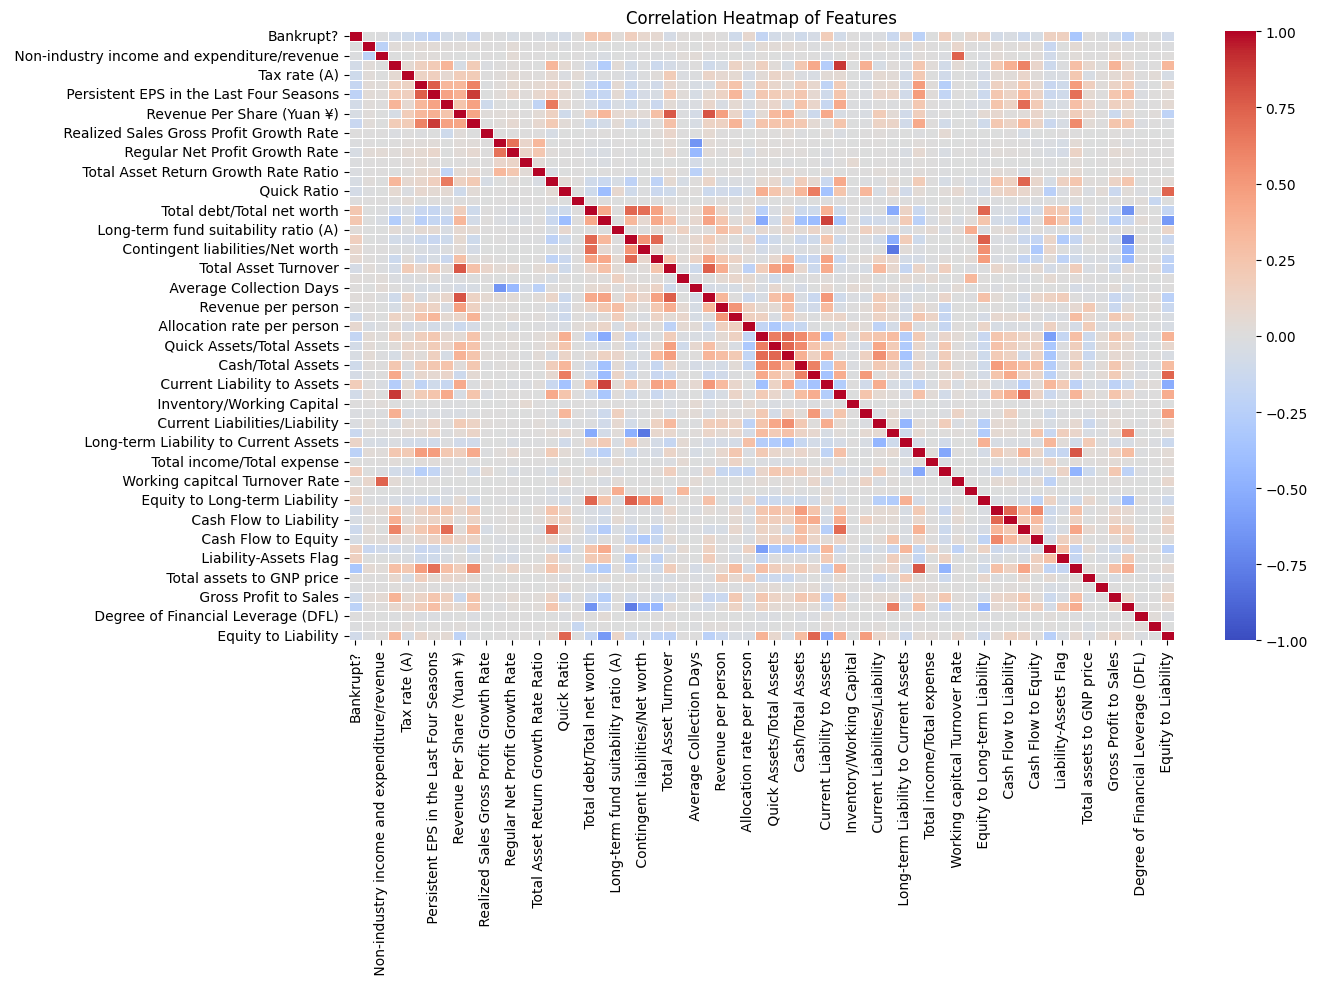

In [22]:
# Calculate the correlation matrix for the dataset
correlation_matrix = df.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm',annot=False,linewidths=0.5,vmin=-1, vmax=1, )

plt.title("Correlation Heatmap of Features")
plt.tight_layout()
plt.show()

In [23]:
df.shape

(5455, 63)

Still we have 63 features which is too much ... So during model training we use feature selection methods to select the best subset for model training

***Model Training***

In [24]:
df.to_csv("df_train.csv")
bankrupted.to_csv("bankrupted.csv")
not_bankrupted.to_csv("not_bankrupted.csv")

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (confusion_matrix, precision_score, recall_score, f1_score, classification_report, roc_auc_score)
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import SMOTE

from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
import tensorflow as tf


**Using ANOVA for feature selection**

In [26]:
# Feature selection using ANOVA
def select_top_features(X, y, top_n=30):
    selector = SelectKBest(score_func=f_classif, k=top_n)
    selector.fit(X, y)
    selected = X.columns[selector.get_support()].tolist()
    return selected

In [27]:
# Prepare data
X = df.drop(columns=['Bankrupt?'])
y = df['Bankrupt?']
top_features = select_top_features(X, y, top_n=30)
X = X[top_features]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

**Using SMOTE for Oversampling**

In [28]:
# Handle imbalance with SMOTE
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)


In [29]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_bal)
X_test_scaled = scaler.transform(X_test)

In [30]:
# Compute class weights
count_0 = np.sum(y_train_bal == 0)
count_1 = np.sum(y_train_bal == 1)
class_weights = {0: 1, 1: count_0 / count_1}


**Gaussian Modelling**

In [31]:
# Train GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train_bal)

GaussianNB()

**Creating DNN Model**

In [32]:
# Deep neural network model
def build_dnn(input_size):
    inputs = Input(shape=(input_size,))
    x = Dense(256, activation='relu')(inputs)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)

    x = Dense(128, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)

    x = Dense(64, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.4)(x)

    outputs = Dense(1, activation='sigmoid')(x)

    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(learning_rate=0.0005),
                  loss='binary_crossentropy',
                  metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])
    return model

In [33]:
# Train DNN
dnn = build_dnn(X_train_scaled.shape[1])
dnn.fit(X_train_scaled, y_train_bal,
        epochs=200,
        batch_size=64,
        validation_split=0.2,
        class_weight=class_weights,
        verbose=0)

**Prediction using Ensemble methods**

In [34]:
# Predict probabilities
gnb_prob = gnb.predict_proba(X_test_scaled)[:, 1]
dnn_prob = dnn.predict(X_test_scaled).flatten()

# Soft voting ensemble
ensemble_prob = (gnb_prob + dnn_prob) / 2

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


**Finding the best threshold**

In [35]:
# Find best threshold
best_thresh = 0.5
best_f1 = 0
for t in np.arange(0.30, 0.60, 0.01):
    preds = (ensemble_prob > t).astype(int)
    score = f1_score(y_test, preds)
    print(f"Threshold: {t:.2f}, F1-Score: {score:.4f}")
    if score > best_f1:
        best_f1 = score
        best_thresh = t

print(f"\nBest threshold: {best_thresh:.2f} with F1-Score: {best_f1:.4f}")

# Final predictions
y_pred = (ensemble_prob > best_thresh).astype(int)

Threshold: 0.30, F1-Score: 0.4872
Threshold: 0.31, F1-Score: 0.4872
Threshold: 0.32, F1-Score: 0.4935
Threshold: 0.33, F1-Score: 0.5135
Threshold: 0.34, F1-Score: 0.5135
Threshold: 0.35, F1-Score: 0.5135
Threshold: 0.36, F1-Score: 0.5135
Threshold: 0.37, F1-Score: 0.5205
Threshold: 0.38, F1-Score: 0.5205
Threshold: 0.39, F1-Score: 0.5205
Threshold: 0.40, F1-Score: 0.5205
Threshold: 0.41, F1-Score: 0.5205
Threshold: 0.42, F1-Score: 0.5000
Threshold: 0.43, F1-Score: 0.5000
Threshold: 0.44, F1-Score: 0.5000
Threshold: 0.45, F1-Score: 0.5000
Threshold: 0.46, F1-Score: 0.5070
Threshold: 0.47, F1-Score: 0.4928
Threshold: 0.48, F1-Score: 0.4848
Threshold: 0.49, F1-Score: 0.4615
Threshold: 0.50, F1-Score: 0.4138
Threshold: 0.51, F1-Score: 0.3333
Threshold: 0.52, F1-Score: 0.2609
Threshold: 0.53, F1-Score: 0.2222
Threshold: 0.54, F1-Score: 0.1860
Threshold: 0.55, F1-Score: 0.1860
Threshold: 0.56, F1-Score: 0.1860
Threshold: 0.57, F1-Score: 0.1860
Threshold: 0.58, F1-Score: 0.1905
Threshold: 0.5

**Model Evaluation**

In [36]:
# Evaluation
cm = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, ensemble_prob)
report = classification_report(y_test, y_pred)

print("\nFinal Evaluation - Ensemble (GaussianNB + DNN):")
print("Confusion Matrix:")
print(cm)
print(f"\nPrecision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")
print(f"ROC AUC:   {roc_auc:.4f}")
print("\nClassification Report:")
print(report)



Final Evaluation - Ensemble (GaussianNB + DNN):
Confusion Matrix:
[[1037   23]
 [  12   19]]

Precision: 0.4524
Recall:    0.6129
F1-Score:  0.5205
ROC AUC:   0.9118

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1060
           1       0.45      0.61      0.52        31

    accuracy                           0.97      1091
   macro avg       0.72      0.80      0.75      1091
weighted avg       0.97      0.97      0.97      1091

